# Convolutional Neural Networks
code adopted from https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/  
modified by Precious Jatau

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("Y.pickle","rb"))

# normalize X using min-max scaling
X = X/255.0
print(X.shape[1:])

(50, 50, 1)


Build CNN
Conv => Pool => Conv => Pool => FC => output

In [10]:
model = Sequential()

# convolution layer with 64, 3x3 filters
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
# max pooling layer with a 2x2 filter
model.add(MaxPooling2D(pool_size = (2,2)))

# convolutional layer with 64, 3x3 filters
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# fully connected layer
model.add(Flatten())
model.add(Dense(64))

# output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

# compile model
model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])

model.fit(X, Y, batch_size = 32, epochs = 4, validation_split = 0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/4
22451/22451 [==============================] - 111s 5ms/sample - loss: 0.6148 - accuracy: 0.6561 - val_loss: 0.5321 - val_accuracy: 0.7351
Epoch 2/4
22451/22451 [==============================] - 107s 5ms/sample - loss: 0.5236 - accuracy: 0.7482 - val_loss: 0.4976 - val_accuracy: 0.7691
Epoch 3/4
22451/22451 [==============================] - 106s 5ms/sample - loss: 0.4812 - accuracy: 0.7750 - val_loss: 0.4677 - val_accuracy: 0.7796
Epoch 4/4
22451/22451 [==============================] - 115s 5ms/sample - loss: 0.4467 - accuracy: 0.7927 - val_loss: 0.4429 - val_accuracy: 0.8012


Visualize first example

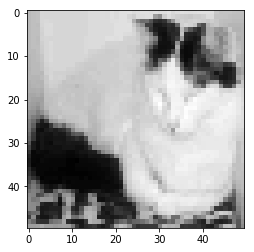

In [56]:
import matplotlib.pyplot as plt
ex = 1
IMG_SIZE = X[ex].shape[1]
plt.imshow(X[ex].reshape(IMG_SIZE,IMG_SIZE), cmap = 'gray')
plt.show()

In [ ]:
Predict first example

In [33]:
predictions = model.predict(X)

In [57]:
print(predictions[ex])
print(predictions[ex] > 0.5) # True for cat, false for dog

[0.88886476]
[ True]
